In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [424]:
def read_data(files: list, path):
    sample_matrix = []
    for file in files:
        with open(os.path.join(path, file), 'r') as f:
            data = f.read().split('\n')[:-1]
            sample_matrix.append(np.array(data).astype(np.float64))
    sample_matrix = np.array(sample_matrix)
    return sample_matrix

In [425]:
from lxml import etree
def read_xml_topology(file, where, what, path="../../config/topology"):
    distances = []
    tree = etree.parse(os.path.join(path, file))
    for route in tree.xpath("/topology"+where):
        distances.append(route.get(what))
    return np.array(distances).astype(np.float64)

In [426]:
def poly_regression(sample_matrix, degree=1):
    X = np.tile(np.arange(1, sample_matrix.shape[1]+1), sample_matrix.shape[0]).reshape(-1, 1)
    y = sample_matrix.flatten()
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X)
    reg = LinearRegression(fit_intercept=True).fit(X_poly, y)
    y_predict = reg.predict(X_poly[:sample_matrix.shape[1]])
    coeff = reg.coef_
    coeff[0] = reg.intercept_ 
    return y_predict, coeff

In [431]:
path = "./sample_ENG"
sample_files_ENG = os.listdir(path)
sample_matrix_ENG = read_data(sample_files_ENG, path)
x = np.arange(1, sample_matrix_ENG.shape[1]+1)
y_predict_ENG, coeff_ENG = poly_regression(sample_matrix_ENG, degree=6)
distances_ENG = read_xml_topology("england.xml", "/routes/route", "distance")

path = "./sample_FRA"
sample_files = os.listdir(path)
sample_matrix_FRA = read_data(sample_files, path)
y_predict_FRA, coeff_FRA = poly_regression(sample_matrix_FRA, degree=6)
distances_FRA = read_xml_topology("france.xml", "/routes/route", "distance")

path = "./sample_SWS"
sample_files = os.listdir(path)
sample_matrix_SWS = read_data(sample_files, path)
y_predict_SWS, coeff_SWS = poly_regression(sample_matrix_SWS, degree=6)
distances_SWS = read_xml_topology("switzerland.xml", "/routes/route", "distance")

path = "./sample_NEE"
sample_files = os.listdir(path)
sample_matrix_NEE = read_data(sample_files, path)
y_predict_NEE, coeff_NEE = poly_regression(sample_matrix_NEE, degree=6)
distances_NEE = read_xml_topology("the_netherlands.xml", "/routes/route", "distance")

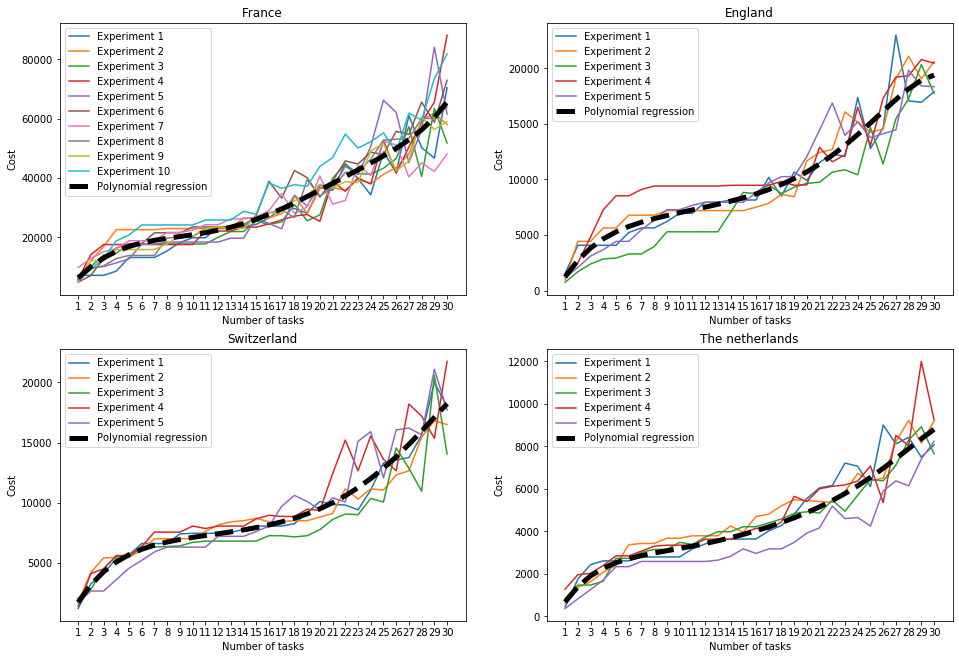

In [432]:
plt.figure(figsize=(16,11))
plt.subplot(221)
for i in range(sample_matrix_FRA.shape[0]):
    plt.plot(x, sample_matrix_FRA[i], label="Experiment "+str(i+1))
plt.plot(x, y_predict_FRA, 'k--', linewidth=5, label="Polynomial regression")
plt.title("France")
plt.xlabel("Number of tasks"), plt.ylabel("Cost")
plt.xticks(x)
plt.legend()

plt.subplot(222)
for i in range(sample_matrix_ENG.shape[0]):
    plt.plot(x, sample_matrix_ENG[i], label="Experiment "+str(i+1))
plt.plot(x, y_predict_ENG, 'k--', linewidth=5, label="Polynomial regression")
plt.title("England")
plt.xlabel("Number of tasks"), plt.ylabel("Cost")
plt.xticks(x)
plt.legend()

plt.subplot(223)
for i in range(sample_matrix_SWS.shape[0]):
    plt.plot(x, sample_matrix_SWS[i], label="Experiment "+str(i+1))
plt.plot(x, y_predict_SWS, 'k--', linewidth=5, label="Polynomial regression")
plt.title("Switzerland")
plt.xlabel("Number of tasks"), plt.ylabel("Cost")
plt.xticks(x)
plt.legend()

plt.subplot(224)
for i in range(sample_matrix_NEE.shape[0]):
    plt.plot(x, sample_matrix_NEE[i], label="Experiment "+str(i+1))
plt.plot(x, y_predict_NEE, 'k--', linewidth=5, label="Polynomial regression")
plt.title("The netherlands")
plt.xlabel("Number of tasks"), plt.ylabel("Cost")
plt.xticks(x)
plt.legend()
plt.show()

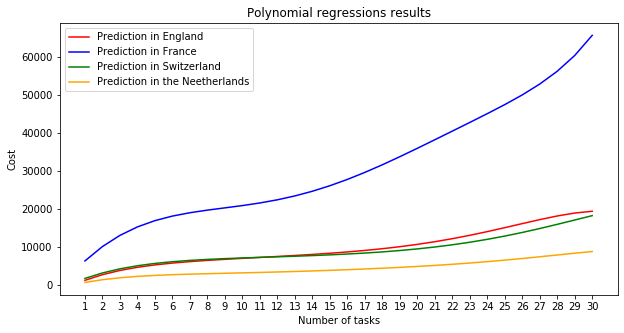

In [434]:
plt.figure(figsize=(10,5))
plt.plot(x, y_predict_ENG, 'r', label="Prediction in England")
plt.plot(x, y_predict_FRA, 'b', label="Prediction in France")
plt.plot(x, y_predict_SWS, 'g', label="Prediction in Switzerland")
plt.plot(x, y_predict_NEE, 'orange', label="Prediction in the Neetherlands")
plt.title("Polynomial regressions results")
plt.xlabel("Number of tasks"), plt.ylabel("Cost")
plt.xticks(x)
plt.legend()
plt.show()

In [364]:
city_nb_ENG = read_xml_topology("england.xml", "/cities/city", "x").size
connexion_coeff_ENG = city_nb_ENG / distances_ENG.size
connexion_coeff_ENG

1.0

In [365]:
city_nb_FRA = read_xml_topology("france.xml", "/cities/city", "x").size
connexion_coeff_FRA = city_nb_FRA / distances_FRA.size
connexion_coeff_FRA

0.75

In [366]:
city_nb_SWS = read_xml_topology("switzerland.xml", "/cities/city", "x").size
connexion_coeff_SWS = city_nb_SWS / distances_SWS.size
connexion_coeff_SWS

0.8

In [436]:
city_nb_NEE = read_xml_topology("the_netherlands.xml", "/cities/city", "x").size
connexion_coeff_NEE = city_nb_NEE / distances_NEE.size
connexion_coeff_NEE

0.5

In [437]:
y_predict_ENG_normalized = (1/connexion_coeff_ENG) * (y_predict_ENG-distances_ENG.mean())/distances_ENG.std()
y_predict_FRA_normalized = (1/connexion_coeff_FRA) * (y_predict_FRA-distances_FRA.mean())/distances_FRA.std()
y_predict_SWS_normalized = (1/connexion_coeff_SWS) * (y_predict_SWS-distances_SWS.mean())/distances_SWS.std()
y_predict_NEE_normalized = (1/connexion_coeff_NEE) * (y_predict_NEE-distances_NEE.mean())/distances_NEE.std()

In [438]:
sample_matrix_ALL_normalized = np.array((y_predict_ENG_normalized, y_predict_FRA_normalized, y_predict_SWS_normalized, y_predict_NEE_normalized))
y_predict_ALL_normalized, coeff_ALL_normalized = poly_regression(sample_matrix_ALL_normalized, degree=6)

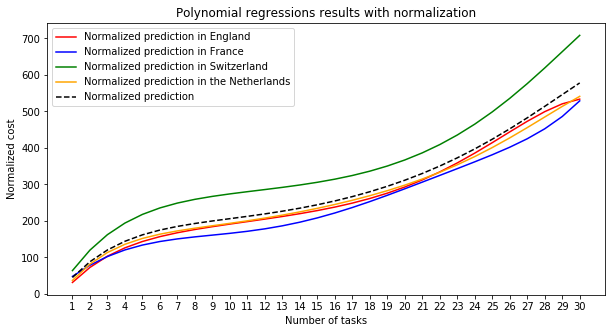

In [439]:
plt.figure(figsize=(10, 5))
plt.plot(x, y_predict_ENG_normalized, 'r', label="Normalized prediction in England")
plt.plot(x, y_predict_FRA_normalized, 'b', label="Normalized prediction in France")
plt.plot(x, y_predict_SWS_normalized, 'g', label="Normalized prediction in Switzerland")
plt.plot(x, y_predict_NEE_normalized, 'orange', label="Normalized prediction in the Netherlands")
plt.plot(x, y_predict_ALL_normalized, 'k--', label="Normalized prediction")
plt.legend()
plt.xlabel("Number of tasks"), plt.ylabel("Normalized cost")
plt.title("Polynomial regressions results with normalization")
plt.xticks(x)
plt.show()

In [450]:
coeff_ALL_normalized

array([-1.21609296e+01,  6.53028340e+01, -8.82729342e+00,  6.67612796e-01,
       -2.76903245e-02,  6.31924496e-04, -6.00349273e-06])

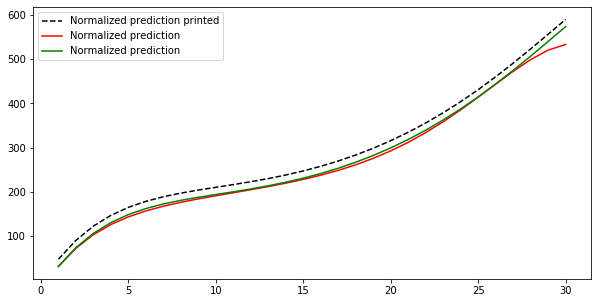

In [422]:
coeff_ALL_ENG = coeff_ALL_normalized.copy()
coeff_ALL_ENG[0] -= y_predict_ALL_normalized[0] - y_predict_ENG_normalized[0]

plt.figure(figsize=(10, 5))
plt.plot(x, print_regression(coeff_ALL_normalized, 31), 'k--', label="Normalized prediction printed")
plt.plot(x, y_predict_ENG_normalized, 'r', label="Normalized prediction")
plt.plot(x, print_regression(coeff_ALL_ENG, 31), 'g', label="Normalized prediction")
plt.legend()
plt.show()

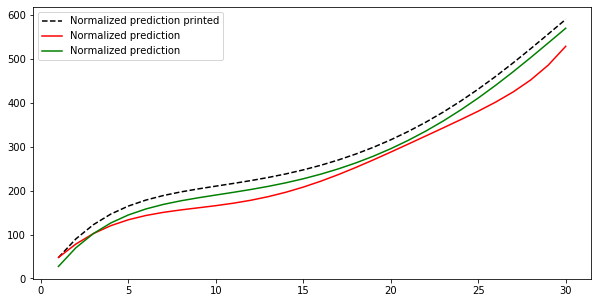

In [423]:
coeff_ALL_FRA = coeff_ALL_normalized.copy()
coeff_ALL_FRA[0] -= y_predict_ALL_normalized[2] - y_predict_FRA_normalized[2]

plt.figure(figsize=(10, 5))
plt.plot(x, print_regression(coeff_ALL_normalized, 31), 'k--', label="Normalized prediction printed")
plt.plot(x, y_predict_FRA_normalized, 'r', label="Normalized prediction")
plt.plot(x, print_regression(coeff_ALL_FRA, 31), 'g', label="Normalized prediction")
plt.legend()
plt.show()